In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [32]:
class Balls:
    
    def __init__(self, N, dim, boundary, T):
        
        self.N        = N
        self.T        = T
        self.dim      = dim
        self.boundary = boundary
        
        np.random.seed(0)
        self.pos = 2*np.random.rand(N,dim)-1
        
        np.random.seed(0)
        self.vel = 2*np.random.rand(N,dim)-1
        
        np.random.seed(0)
        self.rad = np.random.rand(N)
        
        self.tc      = []
        self.results = []
        
        return
        
    def move(self, dt):
        
        pos = self.pos
        vel = self.vel
        
        pos = pos + vel*dt
        
        self.pos = pos
        
        return
    
    def evolve(self):
        
        T             = self.T
        move          = self.move
        plot          = self.plot_results
        record        = self.record
        collide       = self.collide
        collide_judge = self.collide_analytical
        
        t = 0
        dt = T
        record()
        
        while t < T:
    
            collide_judge()
                
            dt = self.tc[-1]
                
            move(dt)
            
            collide()
                
            t += dt
            
            record()
        
        plot()
        
        return
    
    def record(self):
        
        pos     = self.pos
        results = self.results
        
        results.append(pos)
        
        self.results = results
        
        return
    
    def plot_results(self):
        
        N        = self.N
        results  = np.array(self.results)
        boundary = self.boundary
        
        for i in range(N):
            
            plt.plot(results[:,i,0], results[:,i,1])
        
        plt.axis('square')
        plt.title(f'Collision with Particle Numbers = {N} and\nBoundary = {boundary}')
        plt.xlabel('X(m)')
        plt.ylabel('Y(m)')
        plt.savefig(f'N_{N}_particles_with_boundary.png')
        
        return

    def collide_analytical(self):
        
        N        = self.N
        T        = self.T
        tc       = self.tc
        dim      = self.dim
        pos      = self.pos
        vel      = self.vel
        boundary = self.boundary
    
        tc_all = np.zeros((N, 2*dim))
    
        tc_all[:,0:dim] = (boundary - pos)/vel
        tc_all[:,dim:]  = (-boundary - pos)/vel
    
        tc_all[tc_all<=0] = T
        
        tc.append(np.min(tc_all))
        
        self.tc              = tc
        self.collision_index = tc_all==np.min(tc_all)
        
        return
    
    def collide(self):
        
        vel = self.vel
        collision_index = self.collision_index
        
        vel[collision_index[:,0:dim]] = -vel[collision_index[:,0:dim]]
        vel[collision_index[:,dim:]]  = -vel[collision_index[:,dim:]]
        
        self.vel = vel
    
        return


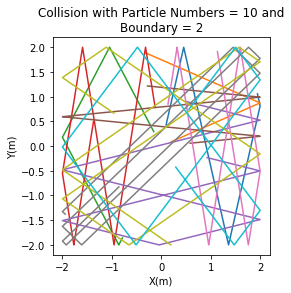

In [33]:
numbers  = 10                  # particle numbers
dim      = 2                   # dimension
boundary = 2                   # boundary
T        = 20                  # total time

balls = Balls(numbers, dim, boundary, T) # balls

balls.evolve()

0.393040120590462


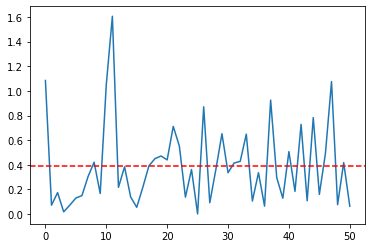

In [27]:
tc = balls.tc
plt.plot(tc)
print(np.sum(tc)/len(tc))
plt.axhline(y=np.sum(tc)/len(tc), color='r', linestyle='--')
